Store location is crucial to store performance because it determines store attractiveness and consumers’ shopping decisions and spending patterns

If we have store locations in the form of latitude and longitude, there are a few things we might want to consider <ol> in part of analysis
* Visualizing the locations on a map : This can give you a spatial distribution of your stores and help you identify any patterns or clusters.
* Calculating the distance between stores : to understand how easy it is for customers to visit stores.
* Determining the surrounding area : to understand your customer base and identify potential new locations.
* Analyzing the competition : using geospatial data to understand the locations of your competitors and assess how your stores compare in terms of location, size, and other factors.

Additional data
* Demographic data : Information about age, income, education level, and other characteristics of the populations near your stores.
* Traffic data : to understand how easy it is for customers to access your stores.
* Competitor data : Information about the locations and characteristics
* Land use data : types of land use in the areas surrounding your stores. To understand the context in which your stores are located.

# Loading Data and Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder

In [3]:
path = '/content/drive/MyDrive/intern_coraline/'

cal = pd.read_csv(path+'calendar.csv')
sellp = pd.read_csv(path+'sell_prices.csv')
ss = pd.read_csv(path+'sample_submission.csv')
eva = pd.read_csv(path+'sales_train_evaluation.csv')
valid = pd.read_csv(path+'sales_train_validation.csv')

DATA FILES<ol>
Calendar :
* date: The date in a “y-m-d” format.
* wm_yr_wk: The id of the week the date belongs to.
* weekday: The type of the day (Saturday, Sunday, …, Friday).
* wday: The id of the weekday, starting from Saturday.
* month: The month of the date.
* year: The year of the date.
* event_name_1: If the date includes an event, the name of this event.
* event_type_1: If the date includes an event, the type of this event.
* event_name_2: If the date includes a second event, the name of this event.
* event_type_2: If the date includes a second event, the type of this event.

Sell Price :
* store_id: The id of the store where the product is sold.
* item_id: The id of the product.
* wm_yr_wk: The id of the week.
* sell_price: The price of the product for the given week/store

Sales Dataset : (sales_train_evaluation : d_1, d_2, ..., d_1941), (sales_train_validation : d_1, d_2, ..., d_1913)
* item_id: The id of the product.
* dept_id: The id of the department the product belongs to.
* cat_id: The id of the category the product belongs to.
* store_id: The id of the store where the product is sold.
* state_id: The State where the store is located.
* d_1, d_2, …, d_i, … d_1941: The number of units sold at day i, starting from 2011-01-29.

Submission
* Demonstrates the correct format for submission

# EDA

Calendar

In [4]:
cal.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [5]:
cal.shape

(1969, 14)

In [6]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


In [7]:
cal['event_name_1'].value_counts()

SuperBowl              6
Pesach End             6
Ramadan starts         6
ValentinesDay          6
NBAFinalsEnd           6
NBAFinalsStart         6
MemorialDay            6
Mother's day           6
Purim End              6
StPatricksDay          6
LentWeek2              6
LentStart              6
PresidentsDay          6
MartinLutherKingDay    5
OrthodoxChristmas      5
EidAlAdha              5
NewYear                5
Chanukah End           5
Christmas              5
Thanksgiving           5
VeteransDay            5
IndependenceDay        5
Halloween              5
ColumbusDay            5
LaborDay               5
Eid al-Fitr            5
Cinco De Mayo          5
OrthodoxEaster         5
Easter                 5
Father's day           4
Name: event_name_1, dtype: int64

In [8]:
cal['event_type_1'].value_counts()

Religious    55
National     52
Cultural     37
Sporting     18
Name: event_type_1, dtype: int64

Sell Prices

In [9]:
sellp.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [10]:
sellp.shape

(6841121, 4)

In [11]:
# There are 10 stores in 3 states
# 4 stores in California : CA_1, CA_2, CA_3, CA_4
# 3 stores in Texas : TX_1, TX_2, TX_3
# 3 stores in Wisconsin : WI_1, WI_2, WI_3

sellp['store_id'].unique()

array(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
       'WI_2', 'WI_3'], dtype=object)

Sales

In [12]:
eva.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [13]:
eva.shape

(30490, 1947)

In [14]:
# Count by dept_id
fig = px.histogram(eva, x="dept_id", width = 1000, height = 500).update_xaxes(categoryorder='total descending')
fig.show()

In [15]:
# Category Item Count
fig = px.histogram(eva, x="cat_id", width=1000, height=500).update_xaxes(categoryorder='total descending')
fig.show()

# There are 3 Categories
# each category - Foods : 14370, Household : 10470, Hobbies : 5650

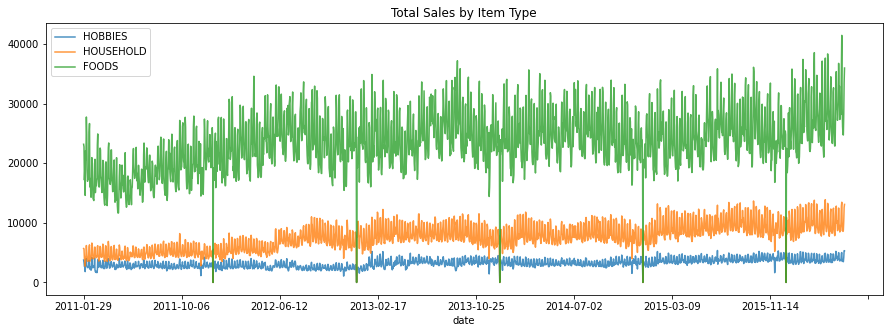

In [16]:
# Total Sales by Item Type
d_cols = [c for c in eva.columns if 'd_' in c]
sales_type = eva.set_index('id')[d_cols].T.merge(cal.set_index('d')['date'], left_index=True, right_index=True, validate = '1:1').set_index('date')

for i in eva['cat_id'].unique():
    items_col = [c for c in sales_type.columns if i in c]
    sales_type[items_col].sum(axis=1).plot(figsize=(15, 5), alpha=0.8, title = 'Total Sales by Item Type')
    
plt.legend(eva['cat_id'].unique())
plt.show()

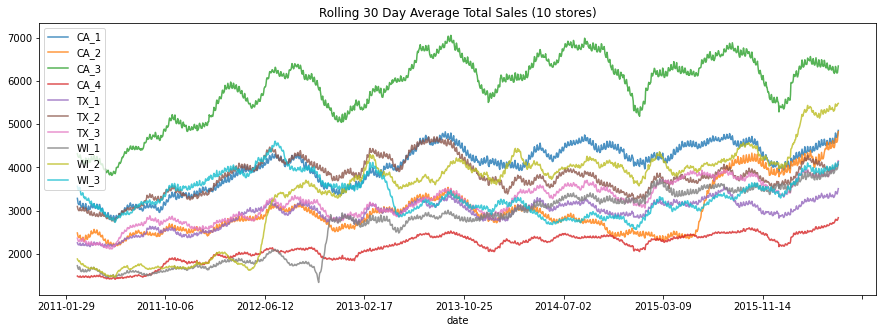

In [17]:
#Total Sales by Store
store_list = sellp['store_id'].unique()

for s in store_list:
    store_items = [c for c in sales_type.columns if s in c]
    sales_type[store_items].sum(axis=1).rolling(30).mean().plot(figsize=(15, 5), alpha=0.8, title='Rolling 30 Day Average Total Sales (10 stores)')

plt.legend(store_list)
plt.show()

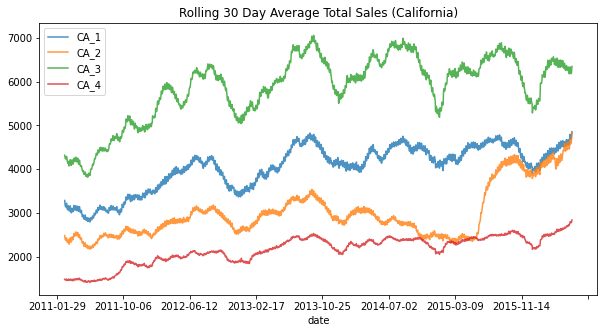

In [18]:
# 30-Day average in state of CA
store_CA = ['CA_1', 'CA_2', 'CA_3', 'CA_4']
for s in store_CA:
    store_items = [c for c in sales_type.columns if s in c]
    sales_type[store_items].sum(axis=1).rolling(30).mean().plot(figsize=(10, 5), alpha=0.8, title='Rolling 30 Day Average Total Sales (California)')

plt.legend(store_CA)
plt.show()

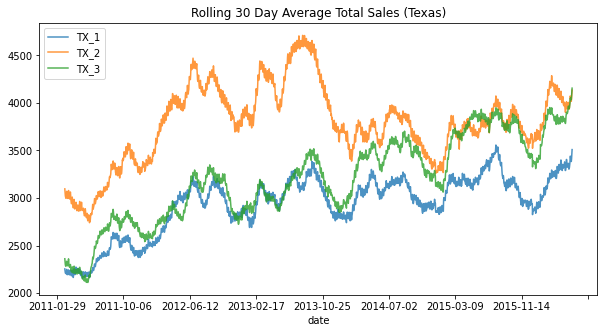

In [19]:
# 30-Day average in state of TX
store_TX = ['TX_1', 'TX_2', 'TX_3']
for s in store_TX:
    store_items = [c for c in sales_type.columns if s in c]
    sales_type[store_items].sum(axis=1).rolling(30).mean().plot(figsize=(10, 5), alpha=0.8, title='Rolling 30 Day Average Total Sales (Texas)')

plt.legend(store_TX)
plt.show()

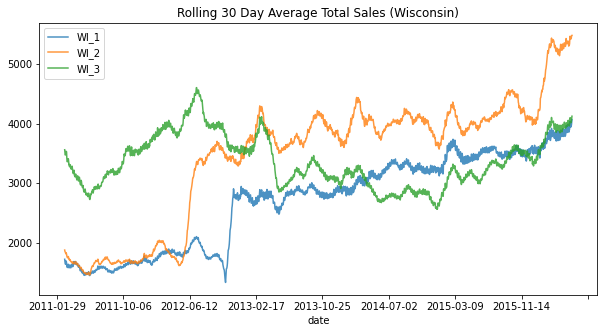

In [20]:
# 30-Day average in state of WI
store_WI = ['WI_1', 'WI_2', 'WI_3']
for s in store_WI:
    store_items = [c for c in sales_type.columns if s in c]
    sales_type[store_items].sum(axis=1).rolling(30).mean().plot(figsize=(10, 5), alpha=0.8, title='Rolling 30 Day Average Total Sales (Wisconsin)')

plt.legend(store_WI)
plt.show()

In [21]:
eva['store_id'].value_counts()
# each store has 3049 items

CA_1    3049
CA_2    3049
CA_3    3049
CA_4    3049
TX_1    3049
TX_2    3049
TX_3    3049
WI_1    3049
WI_2    3049
WI_3    3049
Name: store_id, dtype: int64

In [22]:
eva['state_id'].value_counts()

CA    12196
TX     9147
WI     9147
Name: state_id, dtype: int64

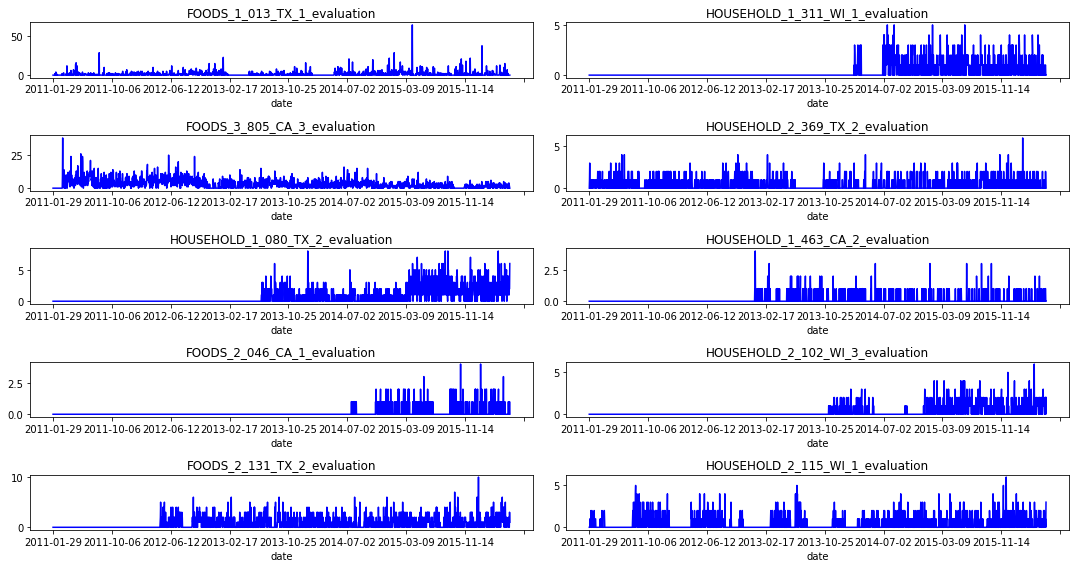

In [23]:
#random plot 10 different items and sales
examples = eva.sample(10, random_state=529).set_index('id')[d_cols].T.merge(cal.set_index('d')['date'],left_index=True,right_index=True,validate='1:1').set_index('date')

fig, axs = plt.subplots(5, 2, figsize=(15, 8))
axs = axs.flatten()
ax_idx = 0
for item in examples.columns:
    examples[item].plot(title=item,
                              color='blue',
                              ax=axs[ax_idx])
    ax_idx += 1
plt.tight_layout()
plt.show()

Submission

In [24]:
ss.head()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model

In [25]:
eva_df = eva.drop(['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], axis =1).set_index('id').T
eva_df['d'] = eva_df.index

In [26]:
eva_df.head()

id,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_006_CA_1_evaluation,HOBBIES_1_007_CA_1_evaluation,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_009_CA_1_evaluation,HOBBIES_1_010_CA_1_evaluation,...,FOODS_3_819_WI_3_evaluation,FOODS_3_820_WI_3_evaluation,FOODS_3_821_WI_3_evaluation,FOODS_3_822_WI_3_evaluation,FOODS_3_823_WI_3_evaluation,FOODS_3_824_WI_3_evaluation,FOODS_3_825_WI_3_evaluation,FOODS_3_826_WI_3_evaluation,FOODS_3_827_WI_3_evaluation,d
d_1,0,0,0,0,0,0,0,12,2,0,...,14,1,0,4,0,0,0,0,0,d_1
d_2,0,0,0,0,0,0,0,15,0,0,...,11,1,0,4,0,0,6,0,0,d_2
d_3,0,0,0,0,0,0,0,0,7,1,...,5,1,0,2,2,0,0,0,0,d_3
d_4,0,0,0,0,0,0,0,0,3,0,...,6,1,0,5,2,0,2,0,0,d_4
d_5,0,0,0,0,0,0,0,0,0,0,...,5,1,0,2,0,0,2,0,0,d_5


In [27]:
df = pd.merge(cal, eva_df, left_on='d', right_on='d', how='left')

In [28]:
def event_detector(x):
  if x == None:
    return 0
  else:
    return 1

In [29]:
df.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,...,FOODS_3_818_WI_3_evaluation,FOODS_3_819_WI_3_evaluation,FOODS_3_820_WI_3_evaluation,FOODS_3_821_WI_3_evaluation,FOODS_3_822_WI_3_evaluation,FOODS_3_823_WI_3_evaluation,FOODS_3_824_WI_3_evaluation,FOODS_3_825_WI_3_evaluation,FOODS_3_826_WI_3_evaluation,FOODS_3_827_WI_3_evaluation
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,...,0.0,14.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,...,0.0,11.0,1.0,0.0,4.0,0.0,0.0,6.0,0.0,0.0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,...,0.0,5.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,...,0.0,6.0,1.0,0.0,5.0,2.0,0.0,2.0,0.0,0.0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,...,0.0,5.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0


In [30]:
df.shape

(1969, 30504)

In [31]:
drp = ['wm_yr_wk', 'weekday', 'year', 'd', 'event_type_1', 'event_type_2']

cols_x = ['wday', 'month', 'event_name_1', 'event_name_2', 'snap_CA', 'snap_TX', 'snap_WI']

df = df.drop(drp, axis=1)
df['event_name_1'] = df['event_name_1'].apply(lambda x: event_detector(x))
df['event_name_2'] = df['event_name_2'].apply(lambda x: event_detector(x))

In [32]:
df.head()

,date,wday,month,event_name_1,event_name_2,snap_CA,snap_TX,snap_WI,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_002_CA_1_evaluation,...,FOODS_3_818_WI_3_evaluation,FOODS_3_819_WI_3_evaluation,FOODS_3_820_WI_3_evaluation,FOODS_3_821_WI_3_evaluation,FOODS_3_822_WI_3_evaluation,FOODS_3_823_WI_3_evaluation,FOODS_3_824_WI_3_evaluation,FOODS_3_825_WI_3_evaluation,FOODS_3_826_WI_3_evaluation,FOODS_3_827_WI_3_evaluation
0,2011-01-29,1,1,1,1,0,0,0,0.0,0.0,...,0.0,14.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
1,2011-01-30,2,1,1,1,0,0,0,0.0,0.0,...,0.0,11.0,1.0,0.0,4.0,0.0,0.0,6.0,0.0,0.0
2,2011-01-31,3,1,1,1,0,0,0,0.0,0.0,...,0.0,5.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0
3,2011-02-01,4,2,1,1,1,1,0,0.0,0.0,...,0.0,6.0,1.0,0.0,5.0,2.0,0.0,2.0,0.0,0.0
4,2011-02-02,5,2,1,1,1,0,1,0.0,0.0,...,0.0,5.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0


In [33]:
ddf = df[(pd.to_datetime(df['date']) < '2016-04-25')&(pd.to_datetime(df['date']) >= '2015-06-19')].drop('date', axis=1)
valid_df = df[(pd.to_datetime(df['date']) >= '2016-04-25')&(pd.to_datetime(df['date']) <= '2016-05-22')].drop('date', axis=1)
eval_df = df[pd.to_datetime(df['date']) >= '2016-05-23'].drop('date', axis=1)

In [34]:
from sklearn.model_selection import train_test_split
X_ddf = ddf[cols_x]
y_ddf = ddf.drop(cols_x, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_ddf, y_ddf, test_size=0.33, random_state=42)

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import TensorBoard
import keras.backend as K
from keras.callbacks import Callback
import tensorflow as tf



def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred -y_true)))


input_dim = X_train.shape[1]
n_out = y_train.shape[1]

model = Sequential([
                Dense(512, input_shape=(input_dim,)),
                Activation('relu'),
                Dropout(0.2),
                Dense(512),
                Activation('relu'),
                Dropout(0.2),
                Dense(n_out),
                Activation('relu'),
                    ])

model.compile(loss='mse',
                 optimizer='adam',
                 metrics=['mse', rmse])
hist = model.fit(X_train, y_train, batch_size = 96, epochs = 250, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)
print("\nTest score:", score[0])

Epoch 1/250
2/2 [==============================] - 3s 243ms/step - loss: 14.7312 - mse: 14.7312 - rmse: 3.8378 - val_loss: 14.2969 - val_mse: 14.2969 - val_rmse: 3.7811
Epoch 2/250
2/2 [==============================] - 0s 44ms/step - loss: 14.2086 - mse: 14.2086 - rmse: 3.7783 - val_loss: 13.4372 - val_mse: 13.4372 - val_rmse: 3.6657
Epoch 3/250
2/2 [==============================] - 0s 45ms/step - loss: 13.3074 - mse: 13.3074 - rmse: 3.6231 - val_loss: 12.4352 - val_mse: 12.4352 - val_rmse: 3.5264
Epoch 4/250
2/2 [==============================] - 0s 45ms/step - loss: 12.2785 - mse: 12.2785 - rmse: 3.5028 - val_loss: 11.5592 - val_mse: 11.5592 - val_rmse: 3.3999
Epoch 5/250
2/2 [==============================] - 0s 44ms/step - loss: 11.3997 - mse: 11.3997 - rmse: 3.3667 - val_loss: 10.9035 - val_mse: 10.9035 - val_rmse: 3.3020
Epoch 6/250
2/2 [==============================] - 0s 47ms/step - loss: 10.6449 - mse: 10.6449 - rmse: 3.2649 - val_loss: 10.2950 - val_mse: 10.2950 - val_rmse

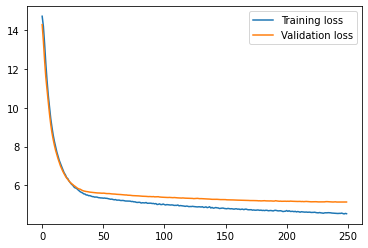

In [36]:
from matplotlib import pyplot as plt
plt.plot(hist.history['loss'], label = 'Training loss')
plt.plot(hist.history['val_loss'], label = 'Validation loss')
plt.legend()

In [37]:
X_valid = valid_df[cols_x]
X_eval = eval_df[cols_x]

# predict validation and evaluation respectively
pred_valid = pd.DataFrame(model.predict(X_valid), columns = ss[0:int(len(ss)/2)].set_index('id').T.columns)
pred_eval = pd.DataFrame(model.predict(X_eval), columns = ss[int(len(ss)/2):].set_index('id').T.columns)
ss_valid =  pred_valid.T
ss_eval = pred_eval.T

# concatenate val and eval
submission_df = pd.concat([ss_valid, ss_eval]).reset_index()
submission_df.columns = ss.columns

submission_df.head()

1/1 [==============================] - 0s 14ms/step


,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0.953160,0.910524,0.971635,1.057729,1.140836,1.244667,1.111416,0.777068,0.696238,...,1.090988,1.207390,0.988165,0.902960,0.829853,0.895160,1.004544,1.106657,1.253233,0.998489
1,HOBBIES_1_002_CA_1_validation,0.018745,0.155649,0.202146,0.249405,0.294598,0.241762,0.143612,0.265223,0.283741,...,0.444561,0.640871,0.491257,0.131292,0.347576,0.412759,0.449007,0.485279,0.392041,0.168816
2,HOBBIES_1_003_CA_1_validation,0.000000,0.000000,0.118626,0.272128,0.396514,0.638790,0.000000,0.000000,0.016027,...,0.873869,0.357365,0.176115,0.000000,0.000000,0.131334,0.322780,0.474624,0.681822,0.062120
3,HOBBIES_1_004_CA_1_validation,2.076824,1.557824,1.387053,1.398017,1.442432,3.820793,2.883817,2.172051,1.637281,...,1.362022,3.747466,2.756704,2.059847,1.557015,1.386597,1.390528,1.430816,3.881733,2.985691
4,HOBBIES_1_005_CA_1_validation,0.809170,0.802066,0.770574,0.764912,0.770248,0.907607,1.245590,1.116800,1.056979,...,0.865879,1.027985,1.017812,0.771240,0.778328,0.764088,0.752722,0.760325,0.924971,0.820807
